In [1]:
import time
from glob import glob
import numpy as np
import pandas as pd
import sklearn.model_selection 
import sklearn.preprocessing
from scipy.misc import imread, imresize
import matplotlib.pyplot as plt
from named_array import NamedArray
from mmeigenwords import MMEigenwords
%matplotlib inline

## prepare data

In [2]:
np.random.seed(514)

# parameter (the weight of links between images and words)
eta = 1.0e10

# load data
X_vis = pd.read_hdf('./data/alexnet_feature.h5', key='df')
Wvi = NamedArray.load('./data/tag_image_link.h5')
Wvi = NamedArray(Wvi * eta, axis_names=Wvi.names) # Wvi *= eta results in different type

# take intersect and split
X_vis = X_vis.loc[set(X_vis.index) & set(Wvi.names[1])]
train_X, test_X = sklearn.model_selection.train_test_split(X_vis, train_size=100000) 
Wvi = Wvi[:, train_X.index.tolist()]

/home/fukui/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## training

In [3]:
%%time
model = MMEigenwords(dim=500)
model.load_corpus('./data/text8_with_phrase',
                  sklearn.preprocessing.normalize(train_X), Wvi, verbose=False)

CPU times: user 2h 6min 47s, sys: 4min 21s, total: 2h 11min 9s
Wall time: 10min 55s


## word and image search

In [7]:
# transform test images
model.map_image(NamedArray(sklearn.preprocessing.normalize(test_X),
                           axis_names=(test_X.index.tolist(), None)))

### top-matches

In [4]:
from imageio import imread
import skimage

def img_id2path(image_id):
    return glob('./dataset/images/%s/%s_*.jpg'%(image_id[:2], image_id))[0]

def read_image(image_id, size):
    return skimage.transform.resize(imread(img_id2path(image_id)), size)

### word -> word

In [24]:
model.most_similar(pos_word=['car'], target='word')

[('car', 1.0),
 ('auto', 0.7518423795700073),
 ('automobile', 0.7410897016525269),
 ('vehicle', 0.5923125147819519),
 ('chevrolet', 0.5632741451263428),
 ('chevy', 0.5474692583084106),
 ('cars', 0.5472819209098816),
 ('volkswagen', 0.5429893136024475),
 ('ford', 0.5401553511619568),
 ('voiture', 0.5167471170425415)]

### word -> image

[('2443841690', 0.6087786555290222),
 ('131085218', 0.5992518067359924),
 ('2190099597', 0.5908710956573486),
 ('1461547095', 0.5835011005401611),
 ('188642038', 0.5803692936897278),
 ('435779608', 0.5734665393829346),
 ('193906507', 0.5613073706626892),
 ('864401461', 0.5605304837226868),
 ('790130426', 0.5575947761535645),
 ('1460345183', 0.5502510070800781)]

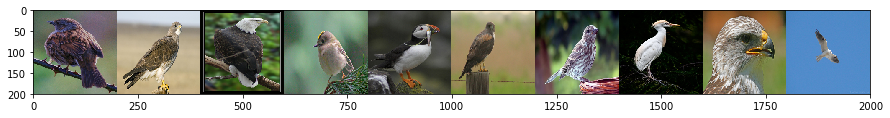

In [11]:
# bird
topmatch_img = model.most_similar(pos_word=['bird'], target='image')
plt.figure(figsize=(15, 150))
plt.imshow(np.concatenate([read_image(img[0], (200, 200)) for img in topmatch_img], axis=1))
plt.grid(False)
topmatch_img

### word + word -> image

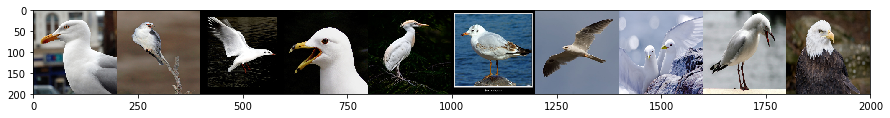

In [15]:
# bird + white
topmatch_img = model.most_similar(pos_word=['bird', 'white'], target='image')
plt.figure(figsize=(15, 150))
plt.imshow(np.concatenate([read_image(img[0], (200, 200)) for img in topmatch_img], axis=1))
plt.grid(False)

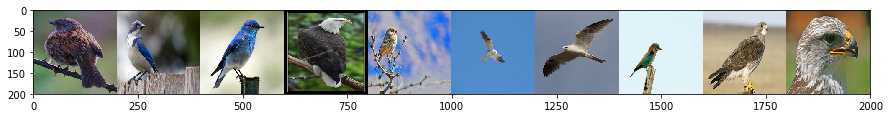

In [18]:
# bird + blue
topmatch_img = model.most_similar(pos_word=['bird', 'blue'], target='image')
plt.figure(figsize=(15, 150))
plt.imshow(np.concatenate([read_image(img[0], (200, 200)) for img in topmatch_img], axis=1))
plt.grid(False)

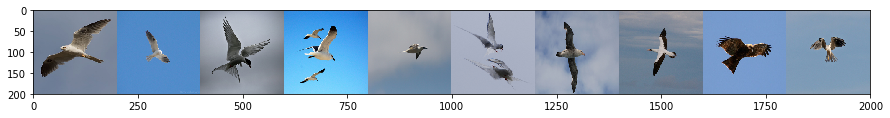

In [19]:
# bird + flying
topmatch_img = model.most_similar(pos_word=['bird', 'flying'], target='image')
plt.figure(figsize=(15, 150))
plt.imshow(np.concatenate([read_image(img[0], (200, 200)) for img in topmatch_img], axis=1))
plt.grid(False)

### image - word1 + wrod2 -> image

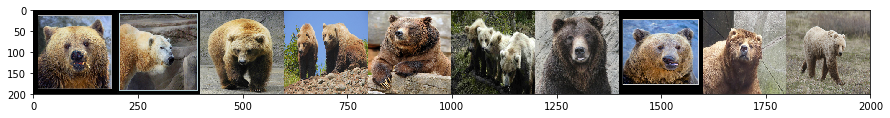

In [20]:
# bear
topmatch_img = model.most_similar(pos_word=['bear'], target='image')
plt.figure(figsize=(15, 150))
plt.imshow(np.concatenate([read_image(img[0], (200, 200)) for img in topmatch_img], axis=1))
plt.grid(False)

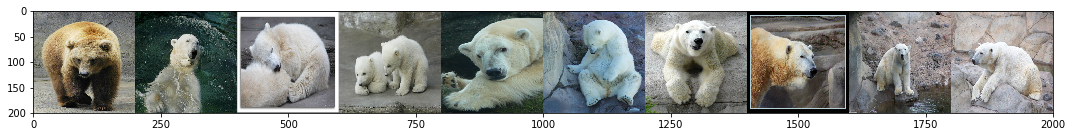

In [23]:
# (an image of a bear) - brown + white
topmatch_img = model.most_similar(pos_img=['273918138'], neg_word=['brown'], pos_word=['white'], target='image')
plt.figure(figsize=(15, 150))
imshow(np.concatenate([read_image(img[0], (200, 200)) for img in topmatch_img], axis=1))